In [9]:
# coding=utf-8
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten, Input, GlobalAveragePooling2D
import sys
import os
import errno
import pickle 
import numpy as np
import sys
# reload(sys)
# sys.setdefaultencoding('utf8')
print(u"你好")

你好


In [0]:
# utils
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if  exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def to_id(file):
    return file.split(".")[0]

def to_labels(idx, ids):
    l = {}
    for id in ids:
        l[id] = idx
    return l
  
def get_ids(path):
    return [to_id(x) for x in os.listdir(path) if x.endswith(".png")]

def get_labels(path):
    classes = [x for x in os.listdir(path) if x.startswith("n")]
    all_ids = [get_ids(path + "/" + clz) for clz in classes]
    labels = {}
    [labels.update(to_labels(classes.index(clz), all_ids[classes.index(clz)])) for clz in classes]
    return (labels, classes)

In [0]:
# build the model

def build_model(input_shape, n_classes, learning_rate = 0.001):
    input = Input(shape=input_shape, name = 'feature_input')
    
    x = input
    x = Conv2D(32, (3,3), activation='relu', padding="same")(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3,3), activation='relu', padding="same")(x)
    x = MaxPooling2D()(x)

    x = Conv2D(128, (3,3), activation='relu', padding="same")(x)
    x = MaxPooling2D()(x)


    x = Flatten()(x)
    x = Dropout(0.25)(x)
    x = Dense(256, name='fc1')(x)
    x = Dense(128, name='fc2')(x)

    x = Dense(n_classes, activation='softmax', name='predictions')(x)
    m = Model(input=input, output=x)
    m.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adagrad(lr=learning_rate),
              metrics=['accuracy'])
    return m


In [0]:

img_width, img_height = 64, 64
def run(model, num_classes, epochs = 50, batch_size = 16):

    train_data_dir="./dataset/train"
    val_data_dir="./dataset/val"

    train_labels, classes = get_labels(train_data_dir)
    nb_train_samples = len(train_labels)

    val_labels, _ = get_labels(val_data_dir)
    nb_val_samples = len(val_labels)
    print ("train vs. val count", nb_train_samples, nb_val_samples)

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False)

    # test_datagen = ImageDataGenerator(rescale=1. / 255)
    val_datagen = ImageDataGenerator()

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

    val_generator = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

    model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        epochs=epochs,
        validation_steps=100,
        validation_data=val_generator)

In [17]:
# build the model
num_classes = 1000
my_model = build_model((img_width,img_height,3), num_classes)
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_input (InputLayer)   (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("pr..., inputs=Tensor("fe...)`


In [8]:
!ls dataset

ls: cannot access 'dataset': No such file or directory


In [0]:
# train the model
run(my_model, num_classes, epochs = 5)

train vs. val count 22000 6000
Found 22000 images belonging to 1000 classes.
Found 6000 images belonging to 1000 classes.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=5, validation_data=<keras.pre..., steps_per_epoch=1375, validation_steps=100)`


Epoch 1/5
1375/1375 [==============================] - 53s 39ms/step - loss: 5.3029 - acc: 0.1414 - val_loss: 7.8794 - val_acc: 0.5044
Epoch 2/5
 228/1375 [===>..........................] - ETA: 54s - loss: 2.5194 - acc: 0.48271375/1375 [==============================] - 65s 47ms/step - loss: 1.8652 - acc: 0.6048 - val_loss: 3.3166 - val_acc: 0.7906
Epoch 3/5
  88/1375 [>.............................] - ETA: 1:12 - loss: 1.1984 - acc: 0.7230

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import imread, imresize
from keras.preprocessing import image

def plt_dir(dir):
  files = os.listdir(dir)
  print(files)
  _, axs = plt.subplots(1, len(files), figsize=(15,15))
  fig = plt.figure()
  for (i,file) in enumerate(files):
    axs[i].imshow(imread(dir + file))

def get_label_dict():
    f=open('./chinese_labels','r')
    label_dict = pickle.load(f)
    f.close()
    return label_dict


In [10]:
# randome some test files
!rm -fr dataset/tests
!mkdir -p dataset/tests/0
!for f in `find dataset/val -type f |sort -R |head -n 16`; do cp ${f} dataset/tests/0; done
!ls dataset/tests/0

sort: write failed: 'standard output': Broken pipe
sort: write error
n00028_16.png  n00179_9.png   n00548_21.png  n00876_20.png
n00034_7.png   n00229_25.png  n00611_24.png  n00901_20.png
n00138_0.png   n00406_14.png  n00647_11.png  n00966_2.png
n00158_25.png  n00514_3.png   n00844_23.png  n00993_1.png


In [11]:
import re
labels = get_label_dict()

def filename_to_char(filename):
  idx = int(re.search("n(\\d+)_", filename).group(1))
  return labels[idx]

def plt_files(basedir, files):
  _, axs = plt.subplots(1, len(files), figsize=(15,15))
  fig = plt.figure()
  for (i,file) in enumerate(files):
    axs[i].imshow(imread(basedir + file))
 
print(filename_to_char("/n12_2.png"))

且


In [12]:
# 使用generator产生数据集做evaluate
test_dir = "dataset/val/"
batch_size = 160
# test_datagen = ImageDataGenerator()

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_height, img_width),
#     batch_size=2)

# X, y = test_generator.next()
# print(X.shape)

def evaluate(model, test_dir, batch_size = 16):
  test_datagen = ImageDataGenerator()
  test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size)
  
  imgs, ys = test_generator.next()
  preds = model.predict(x = imgs, batch_size = batch_size)
  preds = np.argmax(preds, axis=1)
  ys = np.argmax(ys, axis=1)
  return preds, ys, test_generator.classes
  
preds, truths, classes = evaluate(my_model, test_dir, batch_size = batch_size)
print(preds)
print(truths)
print("accuracy is : " + str(np.sum(preds == truths)/float(batch_size)))
print("classes as", classes)

Found 6000 images belonging to 1000 classes.
[ 50 892 635 956 777 406 823 578 474 223  23 718  59 807 950 598 195 772
 816 230 440 383 970 391 372 966 188  20 710 225 476 263  67 344 126  79
 635 502 765 137 801 384 944 677 691 212 529 216 336 303 370 167 919 962
 694  55 111 731  62 185 413 313 177 416  21 502 405 505 537 663 928 868
   9 283 258 826 730  35 476 142 503 734 162 374 593 259 732 202 473 411
  56 278 425 731 857 285 218 474 739  44  41 403 226 837 897 964 512 482
 777 498 236 831 442 258 896 234 731 443 746 889 128 899  77  74 607 292
 276   5 354 661 465 546 556  42 470 735 314 267 552 621 209 549 347 735
 791 843 529 767 562 458 367 764 996 758 225 306 219 998 152 694]
[ 50 892 608 956 777 406 823 578 559 223  23 718  59 807 950 598 195 772
 816 175 440 383 970 391 372 966 188  20 710 225 490 263  67 344 126  79
 635 502 765 137 801 384 944 677 703 212 529 216 336 303 370 203 919 962
 694  55 111 731  62 185 413 313 177 416  21 502 405 505 537 663 928 868
   9 376 258 

Found 16 images belonging to 1 classes.
pred result as...
28/串/串 34/丽/丽 150/估/佑 158/佩/佩 179/侯/侯 229/僚/僚 406/卉/卉 514/吱/吱 548/咖/咖 611/喧/喧 647/囤/囤 844/孝/孝 876/室/室 901/寡/寡 966/峪/峪 993/巷/巷 

the true file names as
串 - 0/n00028_16.png
丽 - 0/n00034_7.png
估 - 0/n00138_0.png
佩 - 0/n00158_25.png
侯 - 0/n00179_9.png
僚 - 0/n00229_25.png
卉 - 0/n00406_14.png
吱 - 0/n00514_3.png
咖 - 0/n00548_21.png
喧 - 0/n00611_24.png
囤 - 0/n00647_11.png
孝 - 0/n00844_23.png
室 - 0/n00876_20.png
寡 - 0/n00901_20.png
峪 - 0/n00966_2.png
巷 - 0/n00993_1.png


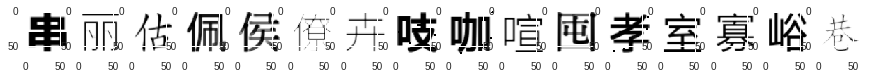

In [13]:
# prediction
def predict(model, img_dir, batch_size = 16):
  pred_datagen = ImageDataGenerator()
  pred_generator = pred_datagen.flow_from_directory(
    img_dir,
    class_mode=None,
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size)
  imgs = pred_generator.next()
  
  preds = model.predict(x = imgs, batch_size = batch_size)
  return np.argmax(preds, axis=1),pred_generator.filenames, pred_generator.classes


pred_dir = "dataset/tests/"
preds, names, classes = predict(my_model, pred_dir)

print("pred result as...")
for i, pred in enumerate(preds):
  sys.stdout.write(str(pred) + "/" + filename_to_char(names[i]) + "/" + labels[pred] + " ")

print("\n")

print("the true file names as")
for name in names[0:16]:
  print(filename_to_char(name) + " - " + name)
    
plt_files(pred_dir, names[0:16])

In [18]:
# evaluate the char WITHOUT keras image flow from directory

def load_imgs(img_path):
    images_files = []
    images_names = []
    if os.path.isdir(img_path):
        images_names = [x for x in os.listdir(img_path) if x.lower().endswith(".jpg") | x.lower().endswith(".png") | x.lower().endswith(".jpeg")]
        images_files = [os.path.join(img_path, x) for x in images_names]
    else:
        images_names.append(os.path.basename(img_path))
        images_files.append(img_path)

    images = [image.load_img(img, target_size=(img_height, img_width)) for img in images_files] 
    images = [np.asarray(img, dtype=np.float16) for img in images]
    return (images_names, np.vstack([np.expand_dims(x, axis=0) for x in images]))

  
def inference(model, test_data_dir, batch_size = 16):
    (names, imgs) = load_imgs(test_data_dir)
    preds = model.predict(x = imgs, batch_size = batch_size)

    return names, np.argmax(preds, axis=1)

infer_dir = "dataset/tests/0/"
names, preds = inference(my_model, infer_dir)

print("pred result as...")
for i, pred in enumerate(preds):
  sys.stdout.write(str(pred) + "/" + filename_to_char(names[i]) + "/" + labels[pred] + " ")


pred result as...
179/侯/侯 548/咖/咖 229/僚/僚 158/佩/佩 34/丽/丽 611/喧/喧 993/巷/巷 28/串/串 966/峪/峪 406/卉/卉 901/寡/寡 844/孝/孝 514/吱/吱 876/室/室 647/囤/囤 150/估/佑 